In [1]:
from itertools import combinations_with_replacement

import numpy as np
from matplotlib import pyplot as plt
from solarcell import solarcell

In [2]:
azur3g30a = solarcell(
    isc=(0.5196, 0.00036),
    voc=(2.690, -0.0062),
    imp=(0.5029, 0.00024),
    vmp=(2.409, -0.0067),
    t=28,
)

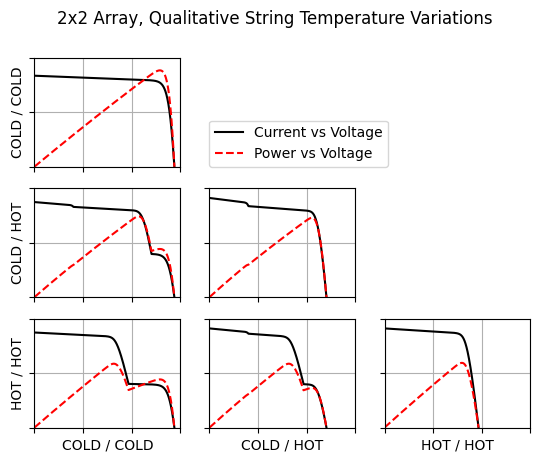

In [3]:
tmin, tmax = 0, 150
temps = tuple(combinations_with_replacement([tmin, tmax], 2))

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)
fig.suptitle("2x2 Array, Qualitative String Temperature Variations")
plt.xlim(0, 6)
plt.ylim(0, 1)

for r, c in np.ndindex(3, 3):
    if np.triu(np.ones((3, 3)), 1)[r, c]:  # delete duplcates
        fig.delaxes(ax[r, c])
        continue
    if c == 0:  # label rows
        cells = ["HOT" if t == tmax else "COLD" for t in temps[r]]
        ax[r, c].set_ylabel("{:s} / {:s}".format(*cells))
    if r == 2:  # label cols
        cells = ["HOT" if t == tmax else "COLD" for t in temps[c]]
        ax[r, c].set_xlabel("{:s} / {:s}".format(*cells))

    t = np.array([temps[r], temps[c]]).T
    g = np.full((2, 2), 0.8)
    array = azur3g30a.array(t, g)
    v = np.linspace(0, array.voc, 1000)
    ax[r, c].plot(v, array.iv(v), "k")
    ax[r, c].plot(v, array.pv(v) / 4.5, "r--")

    ax[r, c].grid()
    ax[r, c].tick_params(labelbottom=False, labelleft=False)

_ = ax[0, 0].legend(["Current vs Voltage", "Power vs Voltage"], loc=(1.2, 0))